<a href="https://colab.research.google.com/github/norayehia/Arima-timeseries-churn/blob/main/time_series_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""

# Install necessary libraries
!pip install pandas matplotlib statsmodels scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
# Replace 'data.csv' with your dataset file path
data = pd.read_csv('data.csv')

# Data preprocessing
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Set Date column as index
data.set_index('Date', inplace=True)

# Check stationarity function
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Churn Analysis
# Define churn
# For example, if a customer hasn't used services for 30 days, consider them churned
churn_window = 30
data['Churn'] = np.where(data['Last_Service_Date'] <= (data.index.max() - pd.Timedelta(days=churn_window)), 1, 0)

# Calculate churn rate
churn_rate = data['Churn'].mean()
print('Churn Rate:', churn_rate)

# Time Series Analysis
# Check stationarity
check_stationarity(data['Churn'])

# If data is non-stationary, apply differencing
# data_diff = data['Churn'].diff().dropna()

# Plot ACF and PACF
# plot_acf(data_diff)
# plot_pacf(data_diff)

# Train-test split
# train_data, test_data = train_test_split(data_diff, test_size=0.2, shuffle=False)

# ARIMA Model
# model = ARIMA(train_data, order=(1, 1, 1))
# fitted_model = model.fit()
# forecast = fitted_model.forecast(steps=len(test_data))
# mse = mean_squared_error(test_data, forecast)
# print('Mean Squared Error:', mse)

# Plot results
# plt.plot(test_data, color='blue', label='Actual')
# plt.plot(forecast, color='red', label='Forecast')
# plt.legend()
# plt.show()



"""

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create a sample DataFrame
date_range = pd.date_range(start='2024-01-01', end='2024-05-31', freq='D')
last_service_dates = pd.date_range(start='2023-12-01', periods=len(date_range), freq='15D')
data = {
    'Date': date_range,
    'Last_Service_Date': last_service_dates
}
df = pd.DataFrame(data)

# Data preprocessing
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Last_Service_Date
Date,
2024-01-01,2023-12-01
2024-01-02,2023-12-16
2024-01-03,2023-12-31
2024-01-04,2024-01-15
2024-01-05,2024-01-30


In [ ]:

# Churn Analysis
# Define churn
churn_window = 30
df['Churn'] = np.where(df['Last_Service_Date'] <= (df.index.max() - pd.Timedelta(days=churn_window)), 1, 0)

# Calculate churn rate
churn_rate = df['Churn'].mean()
print('Churn Rate:', churn_rate)

Churn Rate: 0.07236842105263158


In [ ]:
df.head()

,Last_Service_Date,Churn
Date,,
2024-01-01,2023-12-01,1
2024-01-02,2023-12-16,1
2024-01-03,2023-12-31,1
2024-01-04,2024-01-15,1
2024-01-05,2024-01-30,1


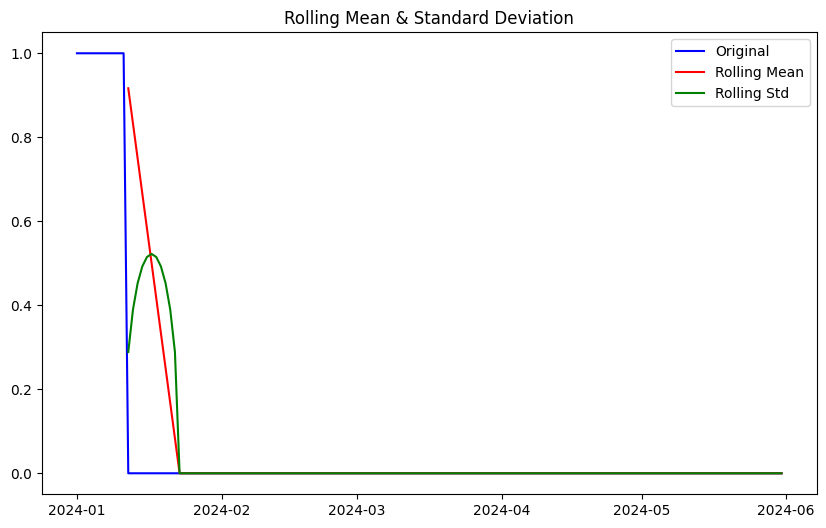

ADF Statistic: -3.716795600570985
p-value: 0.003883016412792589
Critical Values:
	1%: -3.4744158894942156
	5%: -2.880878382771059
	10%: -2.577081275821236


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [ ]:

# Time Series Analysis
# Check stationarity
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

check_stationarity(df['Churn'])


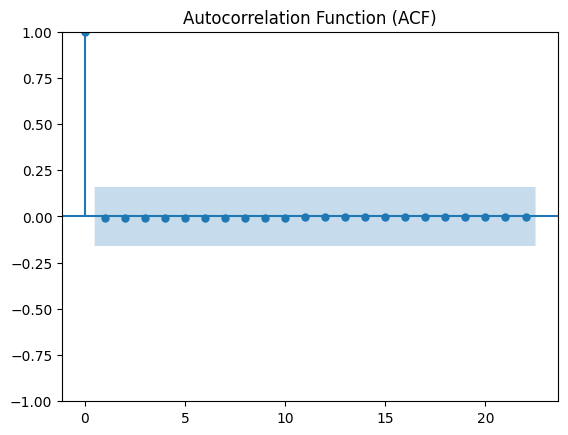

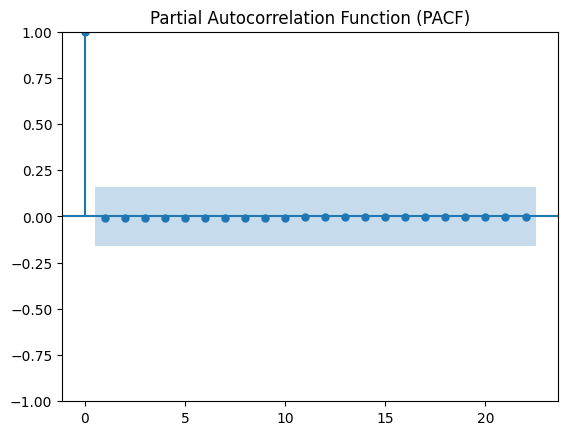

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# If data is non-stationary, apply differencing
data_diff = df['Churn'].diff().dropna()

# Plot ACF and PACF
plot_acf(data_diff)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data_diff)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

The ARIMA (AutoRegressive Integrated Moving Average) model is a popular choice for time series forecasting due to its simplicity and effectiveness, especially when dealing with stationary or near-stationary data. Here's why the ARIMA model is commonly used for time series forecasting:

1. **Flexibility**: ARIMA can handle a wide range of time series data patterns, including trend, seasonality, and autocorrelation.

2. **Robustness**: ARIMA is robust to outliers and missing data, making it suitable for real-world datasets that may contain irregularities.

3. **Interpretability**: The parameters of the ARIMA model (p, d, q) have intuitive interpretations:
   - p (AutoRegressive order): The number of lag observations included in the model.
   - d (Integrated order): The number of differences needed to make the time series stationary.
   - q (Moving Average order): The size of the moving average window.

4. **Diagnostic Tools**: ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots can help identify appropriate values for p and q, making ARIMA easy to tune.

5. **Performance**: ARIMA has been used successfully in various domains, including finance, economics, and demand forecasting, demonstrating its effectiveness in capturing underlying patterns in time series data.

6. **Availability**: ARIMA implementation is readily available in popular libraries like statsmodels in Python, making it accessible and easy to use for analysts and data scientists.

However, it's worth noting that while ARIMA is a powerful model, it has some limitations. For instance, ARIMA assumes linear relationships between variables and may not perform well on non-linear data patterns. Additionally, ARIMA may not capture complex seasonal patterns effectively, requiring more sophisticated models like SARIMA (Seasonal ARIMA) or machine learning approaches for improved accuracy in such cases.

In [ ]:
data_diff

Date
2024-01-02    0.0
2024-01-03    0.0
2024-01-04    0.0
2024-01-05    0.0
2024-01-06    0.0
             ... 
2024-05-27    0.0
2024-05-28    0.0
2024-05-29    0.0
2024-05-30    0.0
2024-05-31    0.0
Name: Churn, Length: 151, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Mean Squared Error: 6.958540511028922e-05


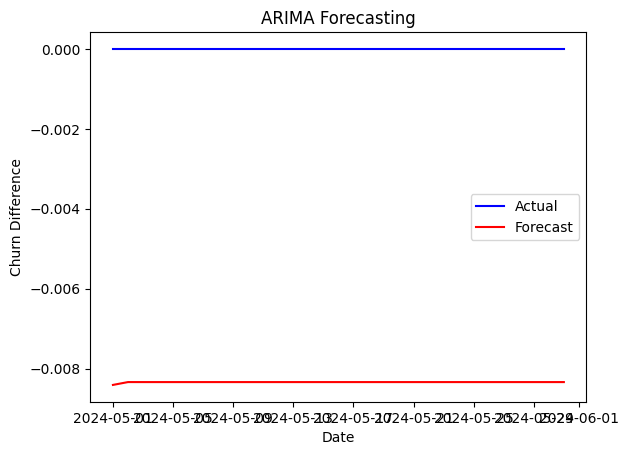

In [ ]:


# Train-test split
train_data, test_data = train_test_split(data_diff, test_size=0.2, shuffle=False)

# ARIMA Model
model = ARIMA(train_data, order=(1, 0, 1))  # Adjust order if needed
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test_data))

# Calculate Mean Squared Error
mse = mean_squared_error(test_data, forecast)
print('Mean Squared Error:', mse)

# Plot results
plt.plot(test_data, color='blue', label='Actual')
plt.plot(test_data.index, forecast, color='red', label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Churn Difference')
plt.legend()
plt.show()
